In [174]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [175]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [176]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [177]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [178]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [179]:
df_train.shape

(1460, 81)

In [180]:
df_test.shape

(1459, 80)

In [181]:
import pandas_profiling

#pandas_profiling.ProfileReport(df_train)

In [182]:
df_train['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

In [183]:
# Save the "Id" column and drop the column from the data since it's unnecessary for the prediction process.
##Save
train_Id = df_train['Id']
test_Id = df_test['Id']

##Drop
df_train.drop("Id", axis=1, inplace=True)
df_test.drop("Id", axis=1, inplace=True)

## Data Processing ##

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

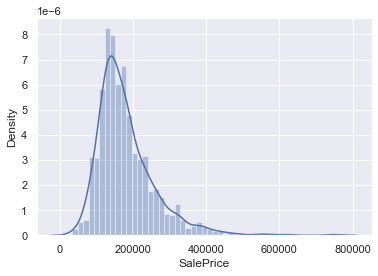

In [184]:
#histogram
sns.distplot(df_train['SalePrice'])

mu = 180921.20 and sigma = 79415.29


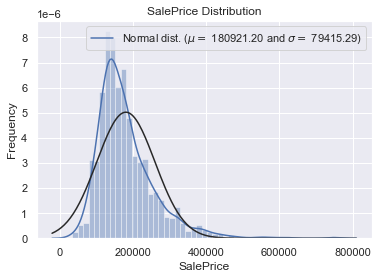

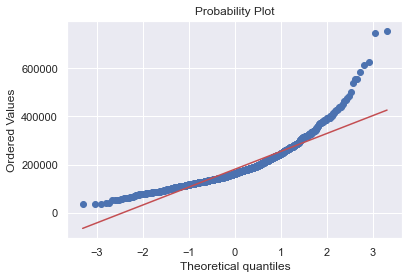

In [185]:
sns.distplot(df_train['SalePrice'], fit=norm);

#Get the fitted parameters used by the function
mu, sigma = norm.fit(df_train['SalePrice'])
print("mu = {:.2f} and sigma = {:.2f}".format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best');
plt.ylabel('Frequency')
plt.title("SalePrice Distribution")

#Show QQ-plot
fig= plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

# Log-transformation of the target variable
The target data("SalePrice") is right skewed. As (linear) model love normally distributed data, we need to transform this variable and make it more normally distributed.


 mu = 12.02 and sigma = 0.40



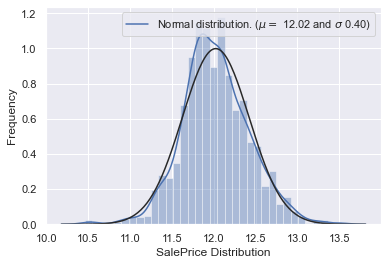

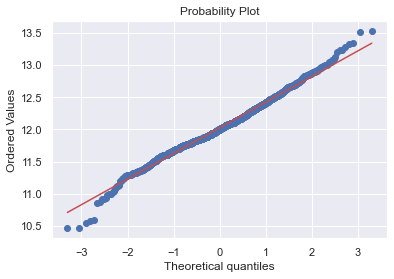

In [186]:
#Log-transformation of the target variable
#use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
#Check New Distribution
sns.distplot(df_train['SalePrice'], fit=norm)

# Get the fitted parameters used by function
mu, sigma = norm.fit(df_train['SalePrice'])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu,sigma))

#Plot the distribution
plt.legend(["Normal distribution. ($\mu=$ {:.2f} and $\sigma$ {:.2f})".format(mu,sigma)],
          loc = "best")

plt.legend(["Normal distribution. ($\mu=$ {:.2f} and $\sigma$ {:.2f})".format(mu,sigma)],
          loc = "best")
plt.ylabel("Frequency")
plt.xlabel("SalePrice Distribution")

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

#Result : The skew seems now corrected and the data appears more normally distributed.

# Features engineering

In [187]:
#first, concatenate the train and test data in the same dataframe
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train['SalePrice'].values

all_data = pd.concat((df_train,df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace = True)
print("all_data size is {}".format(all_data.shape))

all_data size is (2919, 79)


In [188]:
# Missing Data
all_data_na = all_data.isnull().sum()/len(all_data) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657
MiscFeature,96.403
Alley,93.217
Fence,80.439
FireplaceQu,48.647
LotFrontage,16.650
GarageFinish,5.447
GarageYrBlt,5.447
GarageQual,5.447
GarageCond,5.447


Text(0.5, 1.0, 'Percent missing data by feature')

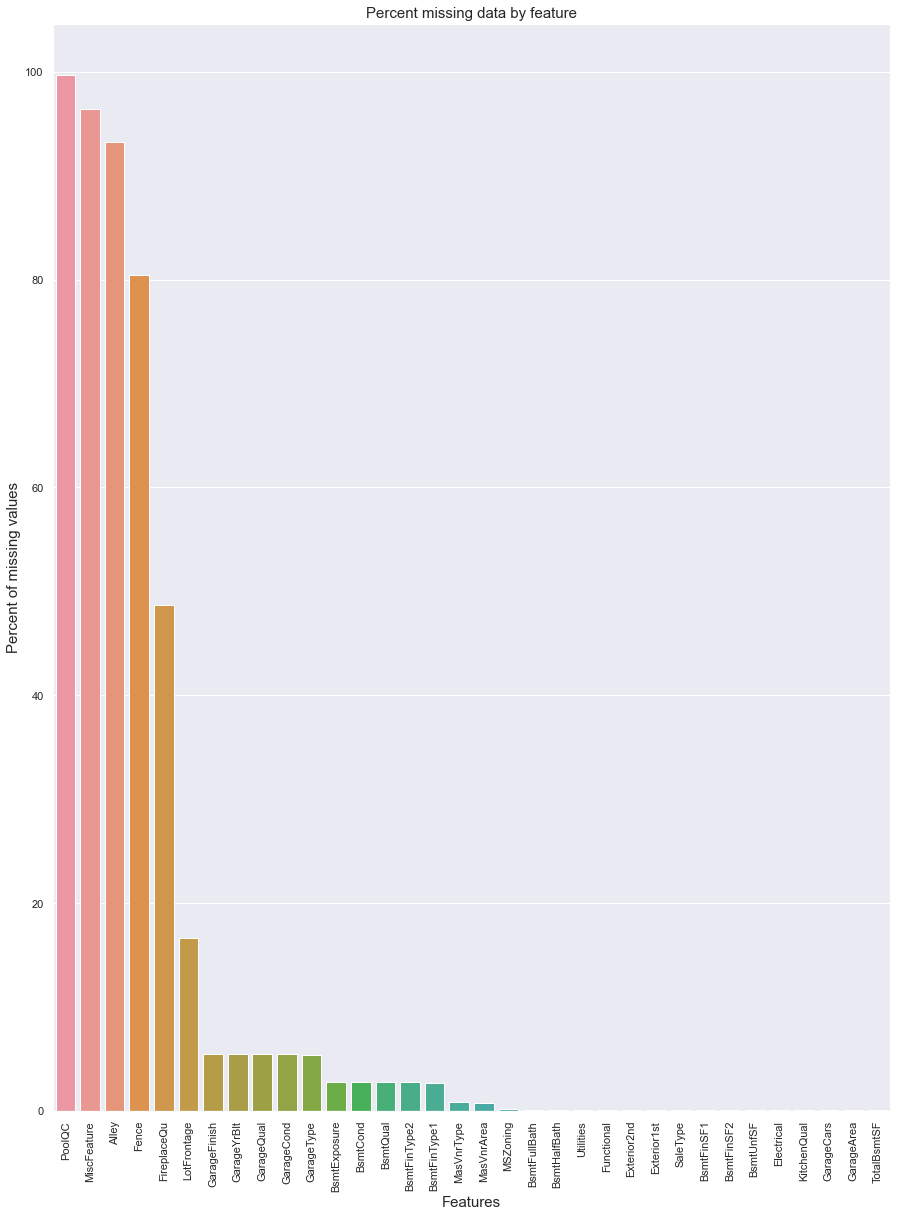

In [189]:
f, ax = plt.subplots(figsize = (15,20))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Percent of missing values", fontsize = 15)
plt.title("Percent missing data by feature", fontsize = 15)

In [190]:
## Imputing missing Values.

#1.first five highest features with missing value get replaced with "None"
for index in missing_data.index[:5]:
    all_data[index] = all_data.index.fillna("None")
    
##2. LotFrontage - fill in missing values by the median LotFrontage of all the neighborbood
## since Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood
all_data["LotFrontage"] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#3. GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
#4. GarageYrBlt, GarageArea and GarageCarsGarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ("GarageYrBlt", "GarageArea", "GarageCars"):
    all_data[col] = all_data[col].fillna(0)
#5. 
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
#6.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

#7.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#8.MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

#9.Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(["Utilities"], axis=1)

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [191]:
# Check if there is missing values if any
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop (all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


## More features engeneering

In [192]:
#Transforming some numerical variables that are really categorical
#MSSubClass=The building class
all_data["MSSubClass"] =all_data["MSSubClass"].astype(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [217]:
#Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    from sklearn.preprocessing import LabelEncoder
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values))
    all_data[col] = lbl.transform(list(all_data[col].values))
    
# shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [ ]:
print("Skewness: {}".format(df_train["SalePrice"].skew()))
print("Kurtosis: {}".format(df_train["SalePrice"].kurt()))

In [ ]:
var1 = 'GrLivArea';
data = pd.concat([df_train["SalePrice"],df_train[var1]], axis=1)
data.plot.scatter(x=var1, y="SalePrice", ylim=(0,800000))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y=df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

In [ ]:
#Deliting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

In [ ]:
var2 = "OverallQual"
data = pd.concat([df_train["SalePrice"],df_train[var2]], axis=1)
plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var2, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
var3 = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var3]], axis=1)
plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var3, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

In [ ]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square = True)

In [ ]:
## Extract data by the most correlated variables.

n = 10; # number of variables for heatmap
cols = corrmat.nlargest(n,'SalePrice')['SalePrice'].index #index로 빼낸다음
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square = True, fmt='.2f', annot_kws={'size': 10},\
           yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# Let's proceed to the scatter plots.
corrmat = df_train.corr()
vars = corrmat.nlargest(n,'SalePrice')['SalePrice'].index.values
sns.set()
sns.pairplot(df_train[vars], size=2.5)
plt.show()

In [ ]:
# missing data count + percentage
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
miss_data = pd.concat([total, percent], axis=1, keys=['total','percent'])
miss_data.head(20)

In [ ]:
#dealing with missing data
#1. drop all other variables with missing values
df_train = df_train.drop(miss_data[miss_data['total']>1].index.values,axis=1) 
#2. drop 'Electrical'
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [ ]:
# check if there's no missing data missing
df_train.isnull().sum().max()

In [ ]:
pip StandardScaler()

In [ ]:
# Out liars
#Univariate analysis: In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.
#standardizing data
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [ ]:
# Bivariate analysis
var = "GrLivArea"
data=pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim = (0,800000))

In [ ]:
#Deleting Points
df_train.sort_values(by="GrLivArea", ascending =False)[:2]
df_train=df_train.drop(df_train[df_train['Id']==1299].index)
df_train=df_train.drop(df_train[df_train['Id']==524].index)

In [ ]:
# Bivariate analysis
var = "GrLivArea"
data=pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim = (0,800000))

In [ ]:
# ###
# According to Hair et al. (2013), four assumptions should be tested:

# Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

# Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

# Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

# Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.
# ###

In [ ]:
#1.In the search for normality
sns.distplot(df_train['SalePrice'], fit=norm);
fig=plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
#It shows 'peakedness', positive skewness and does not follow the diagonal line.

In [ ]:
# Applying log transformation
#df_train['SalePrice']
np.log(df_train['SalePrice'])

In [ ]:
sns.distplot(np.log(df_train['SalePrice']), fit=norm);
fig=plt.figure()
res = stats.probplot(np.log(df_train['SalePrice']), plot=plt)
#It shows 'peakedness', positive skewness and does not follow the diagonal line.

In [ ]:
# Check what's going on with "GrLivArea"
sns.distplot(df_train["GrLivArea"], fit=norm)
fig= plt.figure()
res= stats.probplot(df_train["GrLivArea"], plot=plt)

In [ ]:
#log
sns.distplot(np.log(df_train["GrLivArea"]), fit=norm)
fig= plt.figure()
res= stats.probplot(np.log(df_train["GrLivArea"]), plot=plt)

In [ ]:
# Check what's going on with "TotalBsmtSF"
sns.distplot(df_train["TotalBsmtSF"], fit=norm)
fig= plt.figure()
res = stats.probplot(df_train["TotalBsmtSF"], plot=plt)

In [ ]:
#A big problem because the value zero doesn't allow us to do log transformations.
#To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']),index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] =1

In [ ]:
# Transform data into log data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [ ]:
# This is wrong
# Check what's going on with "TotalBsmtSF"
sns.distplot(df_train["TotalBsmtSF"], fit=norm)
fig= plt.figure()
res = stats.probplot(df_train["TotalBsmtSF"], plot=plt)

In [ ]:
sns.distplot(df_train[df_train["TotalBsmtSF"]>0]['TotalBsmtSF'], fit=norm)
fig= plt.figure()
res = stats.probplot(df_train[df_train["TotalBsmtSF"]>0]['TotalBsmtSF'], plot=plt)